In [ ]:
# Import statements
import pandas as sb
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [ ]:
# Load dataset
bills = sns.load_dataset('tips')

In [ ]:
bills

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
days = ['Thur', 'Fri', 'Sat', 'Sun']
days_range = np.arange(len(days))
smoker = ['Yes','No']

bills_by_days = [bills[bills['day'] == day] for day in days]
bills_by_days_smoker = [[bills_by_days[day][bills_by_days[day]['smoker'] == s] for s in smoker] for day in days_range]
total_by_days_smoker = [[bills_by_days_smoker[day][s]['total_bill'].sum() for s in range(len(smoker))] for day in days_range]
totals = np.asarray(total_by_days_smoker)


In [ ]:
bills_by_days

[     total_bill   tip     sex smoker   day    time  size
 77        27.20  4.00    Male     No  Thur   Lunch     4
 78        22.76  3.00    Male     No  Thur   Lunch     2
 79        17.29  2.71    Male     No  Thur   Lunch     2
 80        19.44  3.00    Male    Yes  Thur   Lunch     2
 81        16.66  3.40    Male     No  Thur   Lunch     2
 ..          ...   ...     ...    ...   ...     ...   ...
 202       13.00  2.00  Female    Yes  Thur   Lunch     2
 203       16.40  2.50  Female    Yes  Thur   Lunch     2
 204       20.53  4.00    Male    Yes  Thur   Lunch     4
 205       16.47  3.23  Female    Yes  Thur   Lunch     3
 243       18.78  3.00  Female     No  Thur  Dinner     2
 
 [62 rows x 7 columns],      total_bill   tip     sex smoker  day    time  size
 90        28.97  3.00    Male    Yes  Fri  Dinner     2
 91        22.49  3.50    Male     No  Fri  Dinner     2
 92         5.75  1.00  Female    Yes  Fri  Dinner     2
 93        16.32  4.30  Female    Yes  Fri  Dinner 

In [ ]:
bills_by_days_smoker

[[     total_bill   tip     sex smoker   day   time  size
  80        19.44  3.00    Male    Yes  Thur  Lunch     2
  83        32.68  5.00    Male    Yes  Thur  Lunch     2
  138       16.00  2.00    Male    Yes  Thur  Lunch     2
  191       19.81  4.19  Female    Yes  Thur  Lunch     2
  192       28.44  2.56    Male    Yes  Thur  Lunch     2
  193       15.48  2.02    Male    Yes  Thur  Lunch     2
  194       16.58  4.00    Male    Yes  Thur  Lunch     2
  196       10.34  2.00    Male    Yes  Thur  Lunch     2
  197       43.11  5.00  Female    Yes  Thur  Lunch     4
  198       13.00  2.00  Female    Yes  Thur  Lunch     2
  199       13.51  2.00    Male    Yes  Thur  Lunch     2
  200       18.71  4.00    Male    Yes  Thur  Lunch     3
  201       12.74  2.01  Female    Yes  Thur  Lunch     2
  202       13.00  2.00  Female    Yes  Thur  Lunch     2
  203       16.40  2.50  Female    Yes  Thur  Lunch     2
  204       20.53  4.00    Male    Yes  Thur  Lunch     4
  205       16

In [ ]:
total_by_days_smoker

[[326.24, 770.0899999999999],
 [252.2, 73.67999999999999],
 [893.6199999999999, 884.7800000000001],
 [458.28, 1168.88]]

In [ ]:
totals

array([[ 326.24,  770.09],
       [ 252.2 ,   73.68],
       [ 893.62,  884.78],
       [ 458.28, 1168.88]])

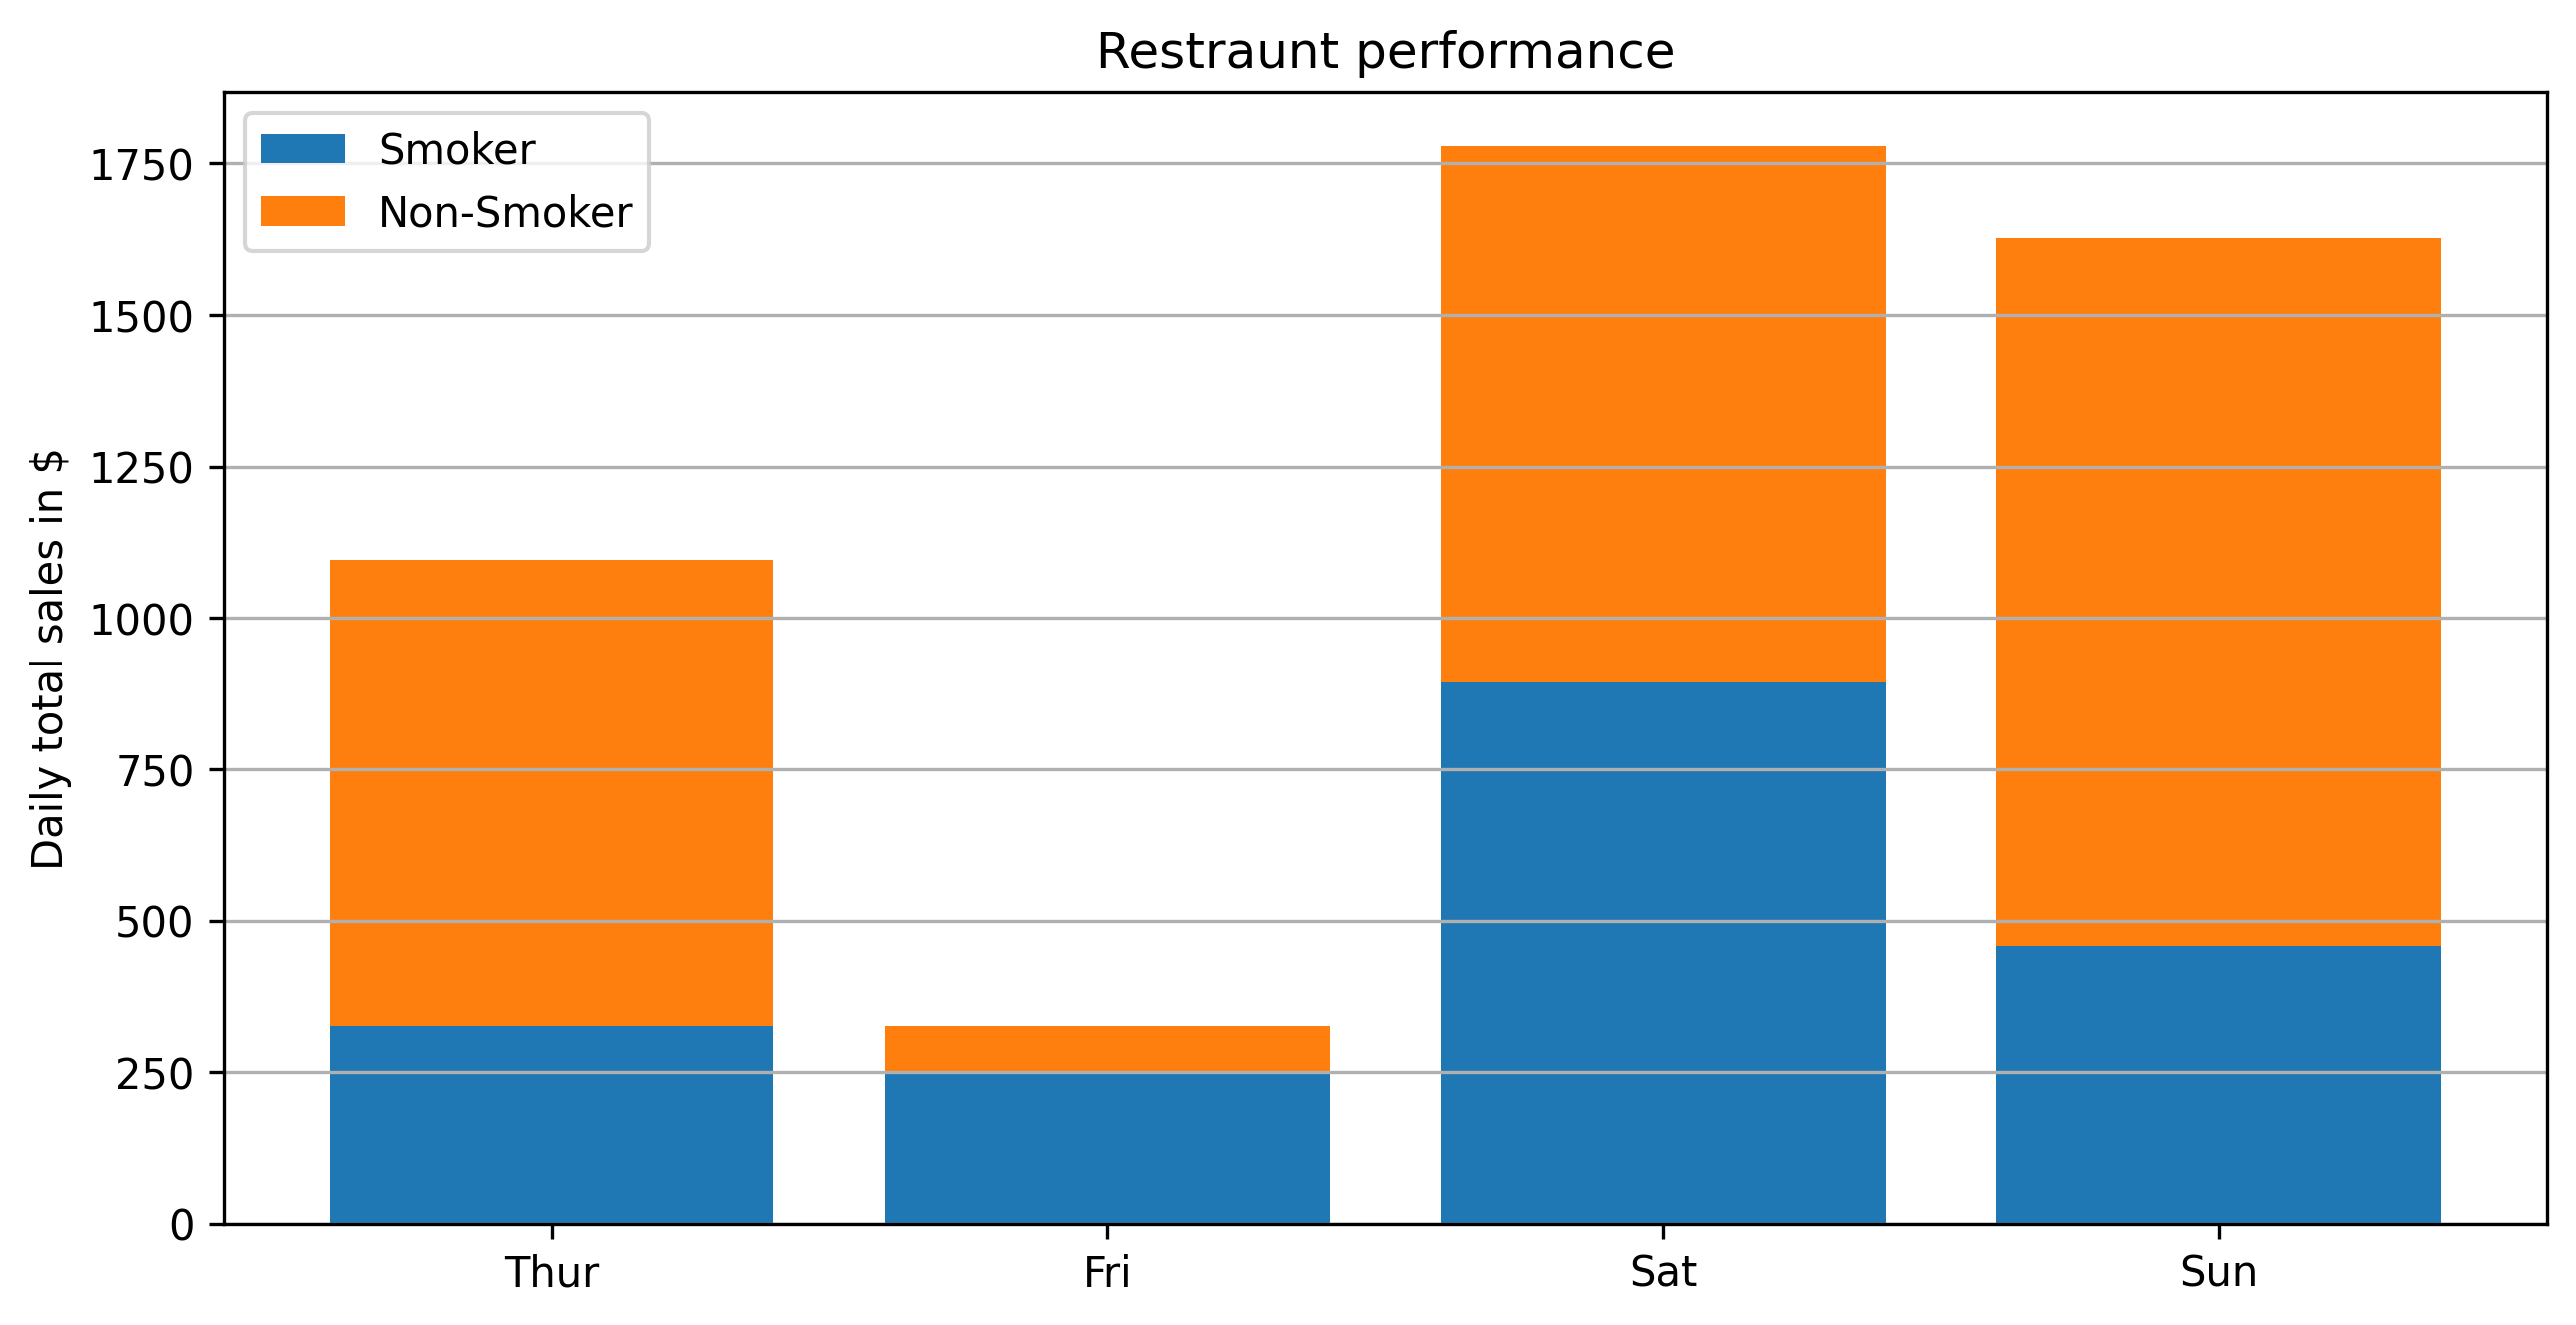

In [ ]:
#Create Figure
plt.figure(figsize=(10,5), dpi= 300)

#Create stacked bar plot
plt.bar(days_range, totals[:, 0], label='Smoker')
plt.bar(days_range, totals[:, 1], bottom=totals[:, 0], label='Non-Smoker')
#Add legend
plt.legend()
#Add labels and titles
plt.xticks(days_range)
ax = plt.gca()
ax.set_xticklabels(days)
ax.yaxis.grid()
plt.ylabel('Daily total sales in $')
plt.title('Restraunt performance')
#Show plot
plt.show()